# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
df = pd.read_csv('E:\Python\Intership (unified)\Amazon Sales Analysis\Amazon Sales data.csv')

In [3]:
df.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
83,Sub-Saharan Africa,Zambia,Snacks,Online,L,1/4/2011,122583663,1/5/2011,4085,152.58,97.44,623289.30,398042.40,225246.90
77,Asia,Laos,Vegetables,Offline,C,9/15/2011,789176547,10/23/2011,3732,154.06,90.93,574951.92,339350.76,235601.16
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
84,Sub-Saharan Africa,Kenya,Vegetables,Online,L,3/18/2012,827844560,4/7/2012,6457,154.06,90.93,994765.42,587135.01,407630.41
47,Europe,Switzerland,Personal Care,Online,M,12/23/2010,617667090,1/31/2011,273,81.73,56.67,22312.29,15470.91,6841.38


### Checking is there still any NULL value in the Dataset

In [4]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### A quick Short Summary of the DATASET

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### Converting all the Column names to Lower Case for simplicity in further process

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')

In [9]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Converting the order_date and ship_date to datetime Formate

In [10]:
# df['order_date'] = df['order_date'].astype('datetime64[ns]')
# df['ship_date'] = df['ship_date'].astype('datetime64[ns]')


df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])


#### Again cheking the type of each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region          100 non-null    object        
 1   country         100 non-null    object        
 2   item_type       100 non-null    object        
 3   sales_channel   100 non-null    object        
 4   order_priority  100 non-null    object        
 5   order_date      100 non-null    datetime64[ns]
 6   order_id        100 non-null    int64         
 7   ship_date       100 non-null    datetime64[ns]
 8   units_sold      100 non-null    int64         
 9   unit_price      100 non-null    float64       
 10  unit_cost       100 non-null    float64       
 11  total_revenue   100 non-null    float64       
 12  total_cost      100 non-null    float64       
 13  total_profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

# Visualizing the Dataset

In [12]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [13]:
# Total profit
total_profit = df['total_profit'].sum()
print(f'Total profit: ${total_profit}')

Total profit: $44168198.39999999


In [14]:
# Total Cost
total_cost = df['total_cost'].sum()
print(f'Total cost: ${total_cost}')

Total cost: $93180569.91000001


In [15]:
# Total revenue
total_revenue = df['total_revenue'].sum()
print(f'Total revenue: ${total_revenue}')

Total revenue: $137348768.31


In [16]:
# Average unit price 
average_unit_price = df['unit_price'].mean()
print(f'Average unit price: ${average_unit_price}')

Average unit price: $276.7613


In [17]:
# Average unit cost
average_unit_cost = df['unit_cost'].mean()
print(f'Average unit cost: ${average_unit_cost}')

Average unit cost: $191.048


In [18]:
# Total units sold of all categories
total_units_sold = df['units_sold'].sum()
print(f'Total units sold: {total_units_sold}')

Total units sold: 512871


#### Year Wise Sales Trend
##### In which year Amazon had made Maximum Revenue and in which year it's Revenue is Minimum 

In [19]:
# Adding Year and Month column from the order_date column in the dataset 
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

C:\Users\khans\AppData\Local\Temp\ipykernel_14156\2702061332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, ax=ax[0], palette="Set1")


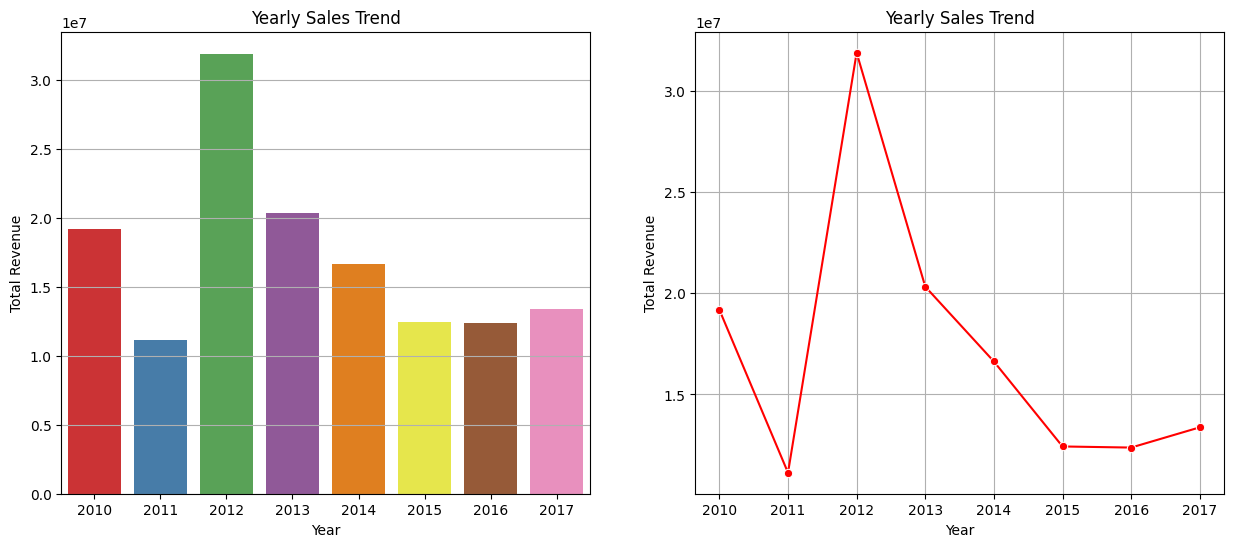

In [20]:
# Creating bar graph of the sales to see in which year the sales were the highest and lowest

yearly_sales = df.groupby('year')['total_revenue'].sum()
# plt.figure(figsize=(10, 6))
# sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette="Set1")

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, ax=ax[0], palette="Set1")
ax[0].set_title('Yearly Sales Trend')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Revenue')
ax[0].grid(axis='y')


sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=ax[1], marker='o', color='r')
ax[1].set_title('Yearly Sales Trend')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Revenue')
plt.xticks(yearly_sales.index)  # Set x-ticks to all years in the index
ax[1].grid(True)


From the above graph we can easily see that Amazon has made Maximum Revenue in the year 2012 and Minimum Revenue in the year 2011.
it is evident that the revenue has seen a significant increase in 2012 compared to 2011. This indicates a successful year for Amazon with a substantial growth in sales. 

C:\Users\khans\AppData\Local\Temp\ipykernel_14156\3391477325.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, ax=ax[0], palette="Set1")


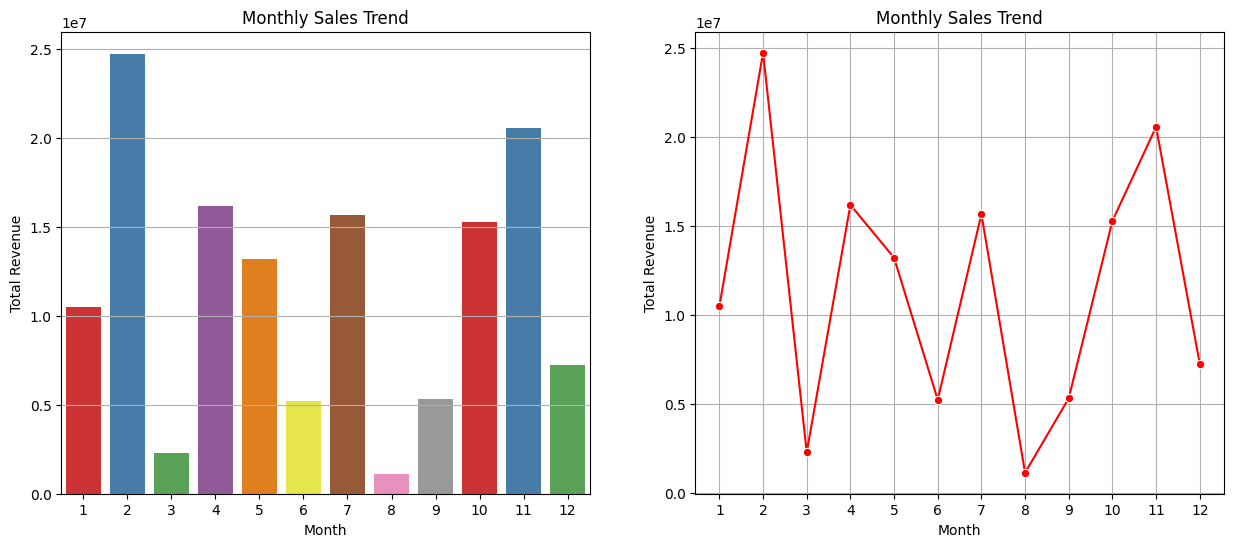

In [23]:
# Creating bar graph of the sales to see in which year the sales were the highest and lowest

monthly_sales = df.groupby('month')['total_revenue'].sum()
# plt.figure(figsize=(10, 6))
# sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette="Set1")

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, ax=ax[0], palette="Set1")
ax[0].set_title('Monthly Sales Trend')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Revenue')
ax[0].grid(axis='y')


sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax[1], marker='o', color='r')
ax[1].set_title('Monthly Sales Trend')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Revenue')
plt.xticks(monthly_sales.index)  # Set x-ticks to all years in the index
ax[1].grid(True)


C:\Users\khans\AppData\Local\Temp\ipykernel_14156\296208293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = total_revenue_by_channel.index, y = total_revenue_by_channel.values, palette="Set1")


Text(0.5, 1.0, 'Total Revenue by Sales Channel')

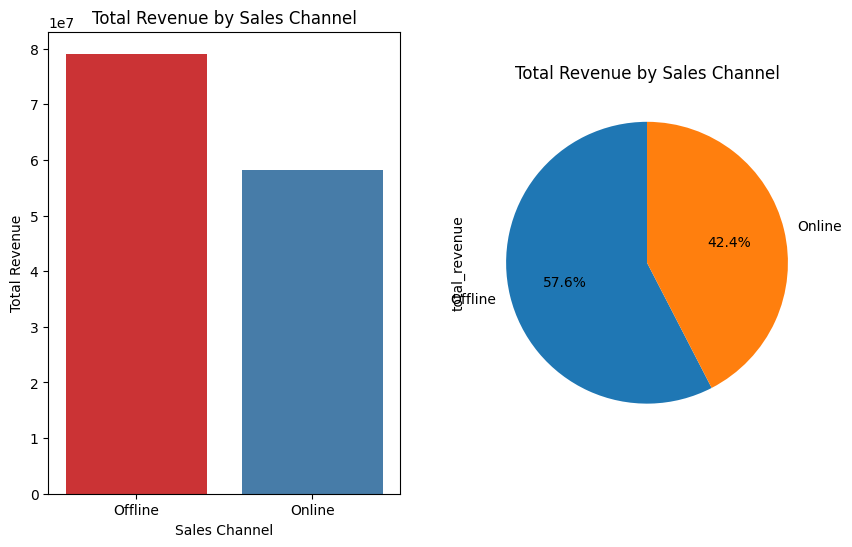

In [42]:
# Total Revenue by Sales Channel
total_revenue_by_channel = df.groupby('sales_channel')['total_revenue'].sum()
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = total_revenue_by_channel.index, y = total_revenue_by_channel.values, palette="Set1")
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
total_revenue_by_channel.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 6))
plt.title('Total Revenue by Sales Channel')

57.6% of the Revenue is coming from the Offline channel.
